Le réseau C est un réseau unitaire: l'eau de la pluie, de la douche, et le reste arrivent ensemble

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Chargement et exploration des données 

In [2]:
file_path = '../Dataset/bronze/sensors_C_20250101_20260108.csv'
df = pd.read_csv(file_path)
df.head()

,value,sensor,ts
0,0.065145,oxygen_f1,2024-12-12 23:59:00
1,11.187500,temperature_f1,2024-12-12 23:59:00
2,0.437338,oxygen_f2,2024-12-12 23:59:00
3,19.146185,ammonium_f2,2024-12-12 23:59:00
4,7.534071,ammonium_f1,2024-12-12 23:59:00


**QUESTION** À quoi correspondent les capteur 'f1' et 'f2' à chaque fois ? 
- L'eau arrive au meme endroit puis est subdivisée en 2: f1 et f2. Théoriquement, le débit d’entrée de f1 devrait être le débit d’entrée de f2 en théorie, donc si oui on s’en débarrasse mais à creuser avec les données.

### Inspection initiale des données
- Structure du DataFrame
- Nombre de capteurs
- Période temporelle couverte
- Valeurs manquantes et valeurs aberrantes

In [3]:
print('Shape:', df.shape)
df.info()

display(df.head())

#Mettre la colonne 'ts' en datetime pour faciliter les études après
df['ts'] = pd.to_datetime(df['ts'])

# Nombre de capteurs uniques
print('Nombre de capteurs uniques:', df['sensor'].nunique())
print('Liste des capteurs:', df['sensor'].unique())

# Période temporelle couverte
print('Min date:', df['ts'].min())
print('Max date:', df['ts'].max())

# Valeurs manquantes
print('Valeurs manquantes par colonne:')
display(df.isnull().sum())

# Valeurs aberrantes (exemple: valeurs négatives si non attendues)
if df['value'].min() < 0:
    print('Attention: valeurs négatives détectées dans la colonne value')

Shape: (7701070, 3)
<class 'pandas.DataFrame'>
RangeIndex: 7701070 entries, 0 to 7701069
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   value   float64
 1   sensor  str    
 2   ts      str    
dtypes: float64(1), str(2)
memory usage: 176.3 MB


,value,sensor,ts
0,0.065145,oxygen_f1,2024-12-12 23:59:00
1,11.187500,temperature_f1,2024-12-12 23:59:00
2,0.437338,oxygen_f2,2024-12-12 23:59:00
3,19.146185,ammonium_f2,2024-12-12 23:59:00
4,7.534071,ammonium_f1,2024-12-12 23:59:00


Nombre de capteurs uniques: 25
Liste des capteurs: <StringArray>
[           'oxygen_f1',       'temperature_f1',            'oxygen_f2',
          'ammonium_f2',          'ammonium_f1',           'nitrate_f2',
           'nitrate_f1',       'temperature_f2',             'redox_f1',
             'redox_f2',              'mlss_f1',              'mlss_f2',
       'entry_debit_f2',        'exit_debit_f1',        'exit_debit_f2',
       'entry_debit_f1',          'entry_debit', 'retour_surpresseur_5',
 'retour_surpresseur_3', 'retour_surpresseur_1',      'retour_vanne_12',
      'retour_vanne_54',      'retour_vanne_25', 'retour_surpresseur_2',
 'retour_surpresseur_4']
Length: 25, dtype: str
Min date: 2024-12-12 23:59:00
Max date: 2026-01-08 10:14:00
Valeurs manquantes par colonne:


value     0
sensor    0
ts        0
dtype: int64

Attention: valeurs négatives détectées dans la colonne value


### Regroupement des données par capteur
Nous allons regrouper les données par capteur pour faciliter l'analyse individuelle de chaque série de mesures.

In [4]:
# Regroupement par capteur et calcul de statistiques descriptives
sensor_groups = df.groupby('sensor')
describe_by_sensor = sensor_groups['value'].describe()
display(describe_by_sensor)

# Exemple d'accès à un groupe particulier
display(sensor_groups.get_group('entry_debit').head())

,count,mean,std,min,25%,50%,75%,max
sensor,,,,,,,,
ammonium_f1,560431.0,5.171233,4.921329,0.000000e+00,1.572060,4.316642,7.618134,1370.071777
ammonium_f2,560431.0,8.304147,8.928708,1.400000e-43,1.649547,5.365809,12.536170,73.779808
entry_debit,371441.0,838.857812,341.257646,4.837494e+00,612.000000,747.450000,936.225000,1658.137000
entry_debit_f1,371444.0,408.234639,157.528010,1.006250e+01,303.562500,364.875000,454.500000,792.375000
entry_debit_f2,371444.0,409.784301,158.061548,1.081250e+01,304.750000,366.250000,456.625000,796.187500
exit_debit_f1,371444.0,420.929119,199.075853,1.423126e+01,287.581200,366.162500,494.243800,1100.000000
exit_debit_f2,371444.0,438.740027,207.361749,9.350006e+00,299.956200,388.437500,524.631300,1100.000000
mlss_f1,112084.0,3.560771,0.840727,0.000000e+00,2.985886,3.393473,4.194033,15.439375
mlss_f2,112084.0,3.674446,0.599212,0.000000e+00,3.200215,3.503851,4.113305,5.786873


,value,sensor,ts
1965498,845.7750,entry_debit,2025-04-25 06:31:00
1965517,844.7625,entry_debit,2025-04-25 06:32:00
1965529,871.8750,entry_debit,2025-04-25 06:33:00
1965550,892.2374,entry_debit,2025-04-25 06:34:00
1965562,906.8624,entry_debit,2025-04-25 06:35:00


**QUESTION** Quels sont les unités pour chacun de nos capteurs ? 
- entry_debit m3/h

### Visualisation individuelle et standardisation des capteurs du débit en entrée


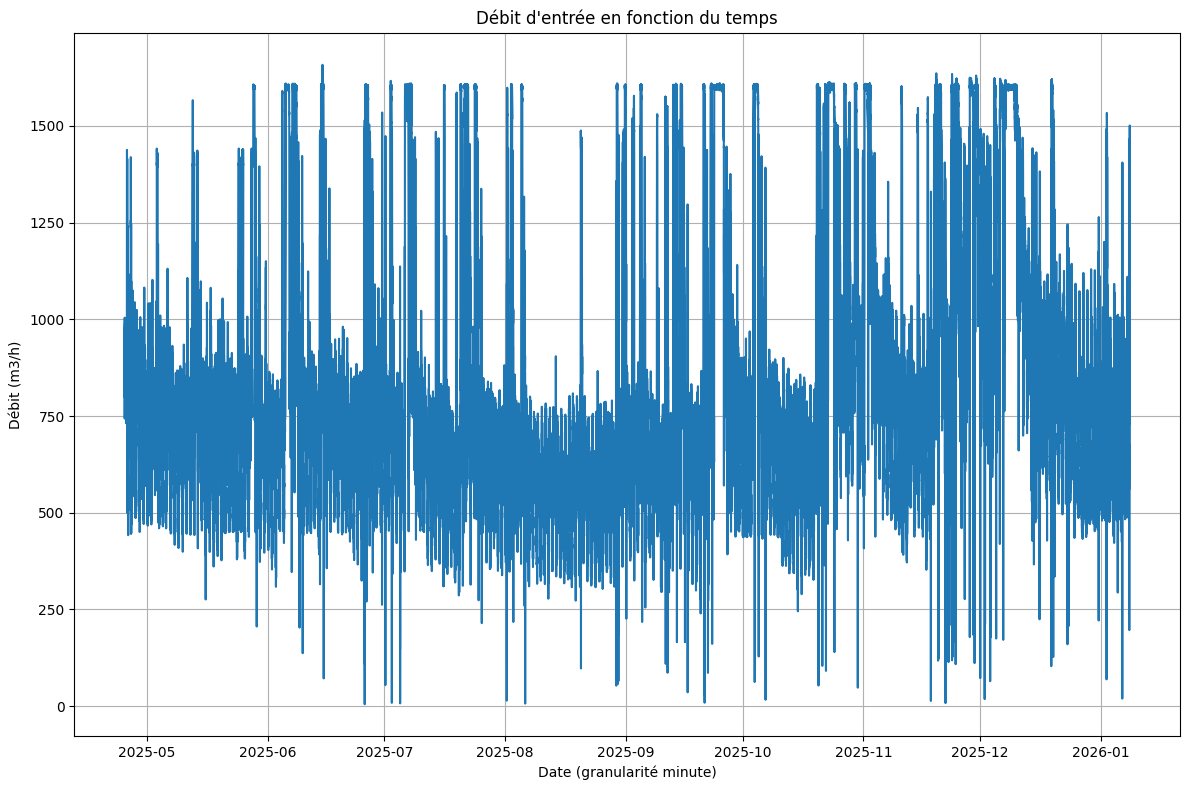

In [ ]:
# Affichage des données du capteur 'entry_debit' avec granularité minute
df_entry_debit = df[df['sensor'] == 'entry_debit'].copy()

plt.figure(figsize=(12,8))
plt.plot(df_entry_debit['ts'],df_entry_debit['value'])
plt.title("Débit d'entrée en fonction du temps (granularité minute)")
plt.xlabel('Date')
plt.ylabel('Débit (m3/h)')
plt.grid()
plt.tight_layout()
plt.show()

/var/folders/7h/jr8cs0b93nxb8bf0k1l1mbx40000gn/T/ipykernel_3183/293241441.py:8: Pandas4Warning: 'd' is deprecated and will be removed in a future version, please use 'D' instead.
  df_daily = df_entry_debit['value'].resample('d').mean()


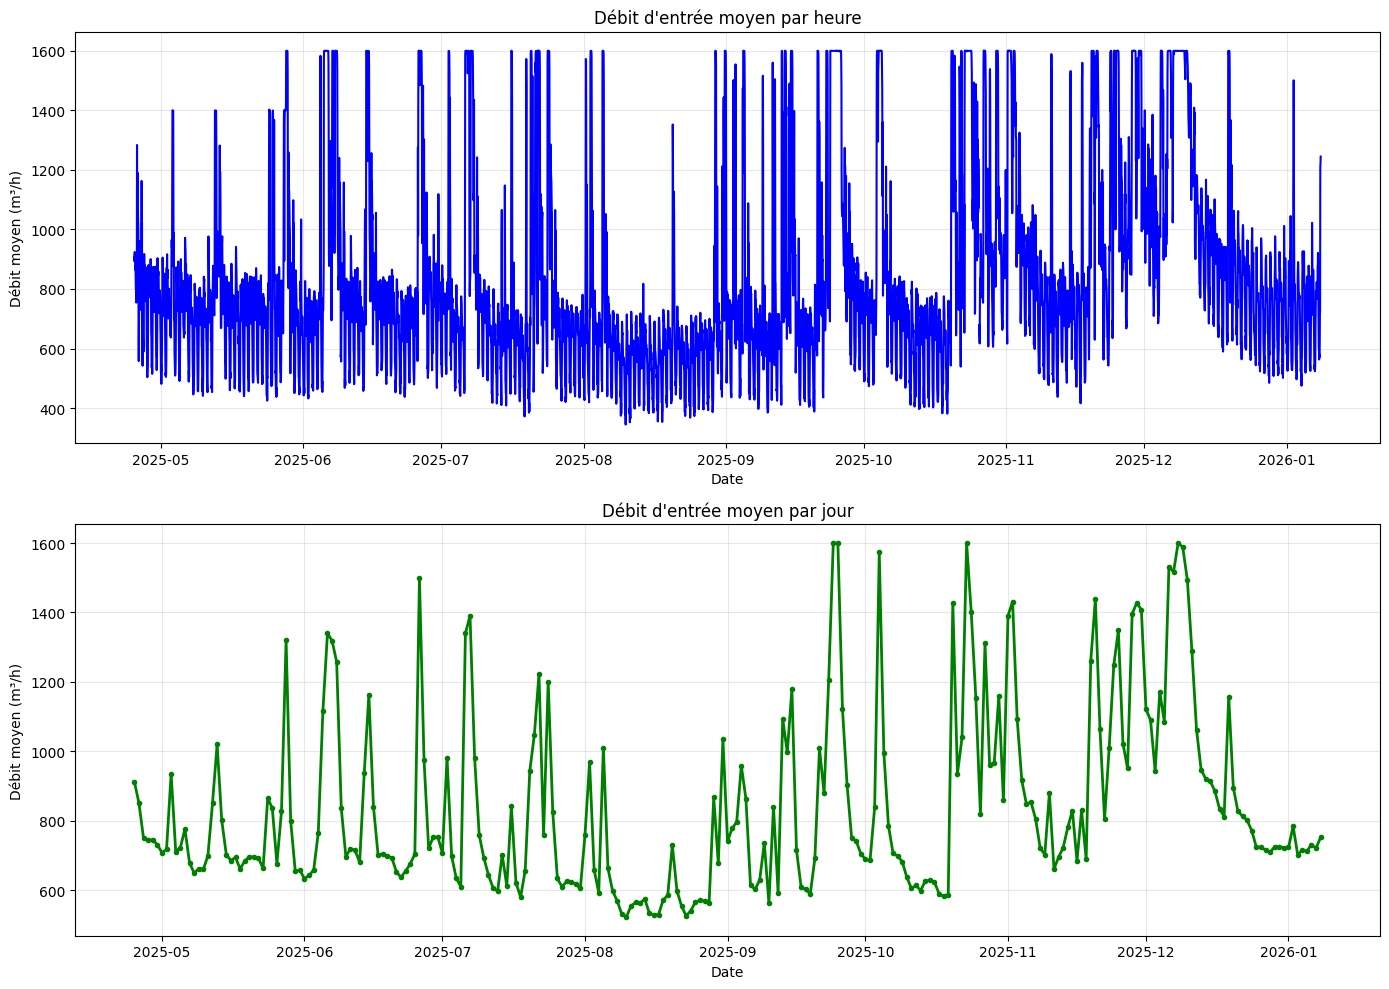

In [ ]:
df_entry_debit = df[df['sensor'] == 'entry_debit'].copy()
df_entry_debit.set_index('ts', inplace=True)

# Agrégation horaire
df_hourly = df_entry_debit['value'].resample('h').mean()

# Agrégation journalière
df_daily = df_entry_debit['value'].resample('D').mean()

# Visualisation comparative
fig, axes = plt.subplots(, 1, figsize=(14, 10))

# Graphe horaire
axes[0].plot(df_hourly.index, df_hourly.values, linewidth=1.5, color='blue')
axes[0].set_title("Débit d'entrée moyen par heure")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Débit moyen (m³/h)')
axes[0].grid(True, alpha=0.3)

# Graphe journalier
axes[1].plot(df_daily.index, df_daily.values, linewidth=2, color='green', marker='o', markersize=3)
axes[1].set_title("Débit d'entrée moyen par jour")
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Débit moyen (m³/h)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

A priori, pour l'instant difficile de dégager une saisonnalité quelconque.

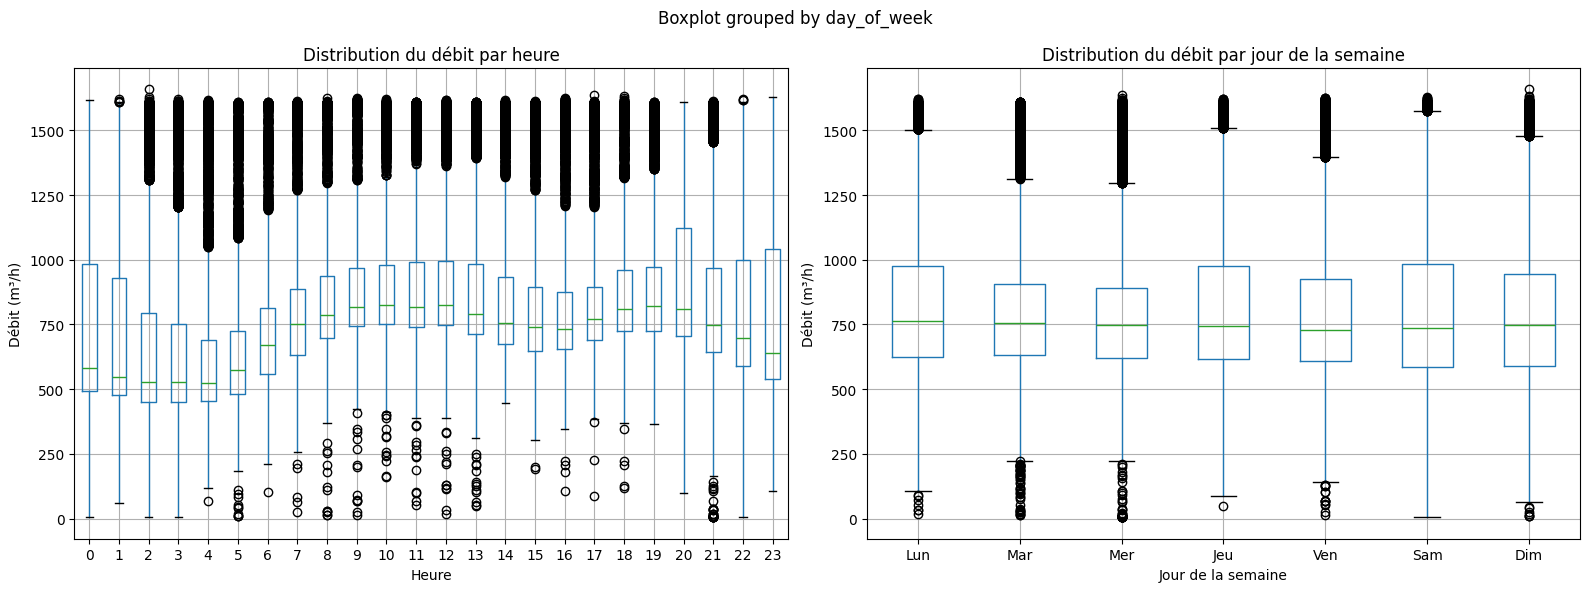

In [ ]:
# Extraction des composantes temporelles
df_entry_debit['hour'] = df_entry_debit.index.hour
df_entry_debit['day_of_week'] = df_entry_debit.index.dayofweek
df_entry_debit['day'] = df_entry_debit.index.day
df_entry_debit['month'] = df_entry_debit.index.month

# Boxplot par heure et par jour de la semaine 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot par heure
df_entry_debit.boxplot(column='value', by='hour', ax=axes[0])
axes[0].set_title('Distribution du débit par heure')
axes[0].set_xlabel('Heure')
axes[0].set_ylabel('Débit (m³/h)')

# Boxplot par jour de semaine
days = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
df_entry_debit.boxplot(column='value', by='day_of_week', ax=axes[1])
axes[1].set_title('Distribution du débit par jour de la semaine')
axes[1].set_xlabel('Jour de la semaine')
axes[1].set_xticklabels(days)
axes[1].set_ylabel('Débit (m³/h)')

plt.suptitle('')
plt.tight_layout()
plt.show()

On peut remarquer une certaine saisonnalité horaire. En effet, de minuit à 6h, il y a une baisse notable du débit. Ensuite on voit une claire augmentation du débit pendant le reste de la journée, avec encore un nouveau petit creux (plus petit) vers 14-16h, puis encore un pic à l'heure du diner. On note tout de même des boîtes plus larges (plus grande variabilité) pour les périodes creuses (Quelle interprétation ?). On observe également la présence de nombreux outliers. Pic exceptionnels, mais très nombreux, a voir pour les explications possibles.

Concernant la saisonnalité hebdomadaire, on peut voire que le débit reste constant quelque soit le jour. La variabilité est également comparable. Il n'y a donc pas de saisonnalité hebdomadaire marquée.

Pour mensuel et annuel, je dirais qu'il y a trop peu de données à notre disposition pour l'instant. 

### Vérification que f1 + f2 = débit d'entrée

Différence (entry_debit - (f1 + f2)):
count    371441.000000
mean         20.838860
std          37.234817
min        -998.237500
25%          -2.450100
50%          13.674900
75%          38.074500
max        1291.562500
Name: difference, dtype: float64
Erreur relative (%):
count    371441.000000
mean          1.507979
std          11.160480
min       -1053.719832
25%          -0.391721
50%           1.826253
75%           4.077689
max          97.755037
Name: error_percent, dtype: float64


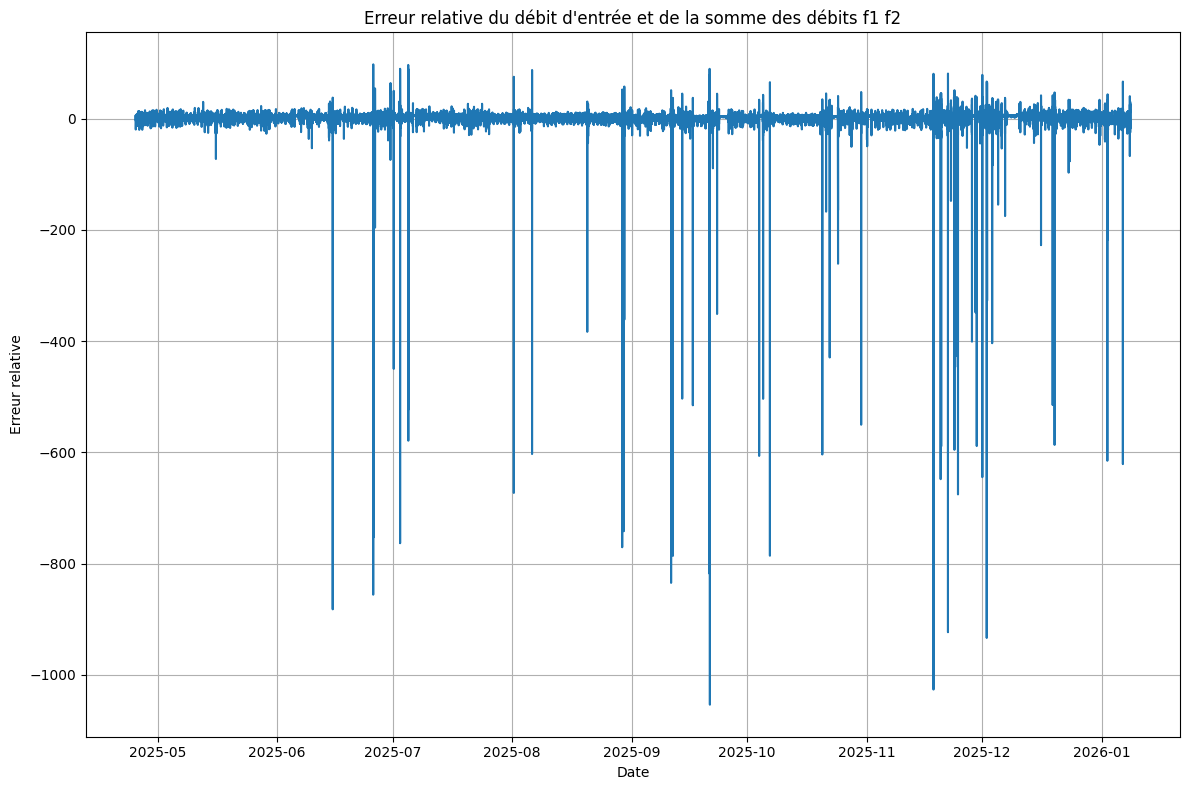

In [16]:
df_entry = df[df['sensor'] == 'entry_debit'].copy().set_index('ts')
df_f1 = df[df['sensor'] == 'entry_debit_f1'].copy().set_index('ts')
df_f2 = df[df['sensor'] == 'entry_debit_f2'].copy().set_index('ts')

# Fusion des données sur le timestamp
df_compare = pd.DataFrame({
    'entry_debit': df_entry['value'],
    'entry_debit_f1': df_f1['value'],
    'entry_debit_f2': df_f2['value']
})

# Ajout d'une colonne somme 
df_compare['f1_f2_sum'] = df_compare['entry_debit_f1'] + df_compare['entry_debit_f2']

# Calcul de la différence et l'erreur relative
df_compare['difference'] = df_compare['entry_debit'] - df_compare['f1_f2_sum']
df_compare['error_percent'] = (df_compare['difference'] / df_compare['entry_debit']) * 100

# Suppression des lignes avec NaN
df_compare_clean = df_compare.dropna()

# Stats
print("Différence (entry_debit - (f1 + f2)):")
print(df_compare_clean['difference'].describe())

print("Erreur relative (%):")
print(df_compare_clean['error_percent'].describe())


plt.figure(figsize=(12,8))
plt.plot(df_compare_clean['error_percent'])
plt.xlabel('Date')
plt.ylabel('Erreur relative')
plt.title("Erreur relative du débit d'entrée et de la somme des débits f1 f2")
plt.grid()
plt.tight_layout()
plt.show()

On peut remarquer que l'erreur relative moyenne entre les capteurs est de 1.5%, ce qui semble plutôt cohérent. On remarque que 75% des données ont une erreur inférieure à 4%. La différence moyenne est positive de 20.84 m3/h. Ceci peut être dû à un biais de calibration d'un des capteurs, un décalage temporel (les capteurs ne mesurent pas exactement au même instant), ou peut être à cause de faibles pertes/fuites.
A discuter mais il semble que dire que le débit d'entrée est bien égal à la somme des débits f1 et f2 soit justifiable.